In [12]:
include("Script/MomentumFunctions.jl")

factor_weight (generic function with 4 methods)

In [87]:
include("/Users/reuben/Explore/VolScript/Revised_Helper_Functions.jl")

get_recent_future_date (generic function with 1 method)

In [88]:
# get futures data from quandl
println("Getting futures data")
c_out, fdata = futures_data()

futDataInit = map(x->x["Close"], fdata)

println("Getting CBOE data")
cboe_data = get_CBOE_data()
setData = get_future_settlements(cboe_data)

println("Get recent future data from Google.")
rec_date = load_google_vix_fut_data() |> get_recent_future_date

n_dict = Dict()
for i in 1:length(setData[1])
    push!(n_dict,setData[1][i] => setData[3][i])
end
n_dict

ts_dict = Dict()
for i=1:length(c_out)
    push!(ts_dict, c_out[i] => futDataInit[i])
end

futData = []

for i in c_out
    if haskey(n_dict, i)
         try
              nn = update(ts_dict[i], rec_date, n_dict[i])
              push!(futData, nn)
          catch
              println("Problem adding google data; is it a weekend?")
              push!(futData, ts_dict[i]) 
        end

    else
        push!(futData, ts_dict[i])
    end
end

# get settlement dates
settle_dates = get_settlement_dates(setData, futData)

println("Getting quandl data.")
# get vix, vxv data from quandl
vixf,vxvf = map(x->quandlget(x,from = "01/01/2001",api_key=auth_default), ["CBOE/VIX","CBOE/VXV"])
vix = vixf["VIX Close"]
vxv = vxvf["CLOSE"]

# merge all futures data into one TimeArray
futures_close_timeseries = futures_merge(futData, codes)

# Get list of dates with data from both vix and futures
ttn = intersect(futures_close_timeseries.timestamp, vix.timestamp)

Getting futures data
 404: Error executing the request.
blank data for CBOE/VXX2018
 404: Error executing the request.
blank data for CBOE/VXZ2018
Getting CBOE data
Get recent future data from Google.
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Problem adding google data; is it a weekend?
Getting quandl data.


872-element Array{Date,1}:
 2014-08-28
 2014-08-29
 2014-09-02
 2014-09-03
 2014-09-04
 2014-09-05
 2014-09-08
 2014-09-09
 2014-09-10
 2014-09-11
 2014-09-12
 2014-09-15
 2014-09-16
 ⋮         
 2018-01-29
 2018-01-30
 2018-01-31
 2018-02-01
 2018-02-02
 2018-02-05
 2018-02-06
 2018-02-07
 2018-02-08
 2018-02-09
 2018-02-12
 2018-02-13

In [95]:
function ivts_calc(dt::Dates.Date, intvl=45)
    vx = vix[dt].values[1]
    vf = get_cm(futures_close_timeseries, dt, codes, settle_dates, intvl)
    return round(vx / vf, 3)
    
end

ivts_calc (generic function with 2 methods)

In [101]:
ivts_table = DataFrame()
ivts_table[:Date] = ttn
ivts_table[:IVTS] = map(ttn) do dt
    out = -1.0
    try
        out = ivts_calc(dt)
    catch
        out = 0.0
    end
    return out
end
ivts_table[end-10:end,:]

11×2 DataFrames.DataFrame
│ Row │ Date       │ IVTS  │
├─────┼────────────┼───────┤
│ 1   │ 2018-01-30 │ 1.055 │
│ 2   │ 2018-01-31 │ 0.995 │
│ 3   │ 2018-02-01 │ 1.007 │
│ 4   │ 2018-02-02 │ 1.142 │
│ 5   │ 2018-02-05 │ 1.335 │
│ 6   │ 2018-02-06 │ 1.43  │
│ 7   │ 2018-02-07 │ 1.397 │
│ 8   │ 2018-02-08 │ 1.556 │
│ 9   │ 2018-02-09 │ 1.435 │
│ 10  │ 2018-02-12 │ 1.301 │
│ 11  │ 2018-02-13 │ 1.27  │

In [18]:
log_df = readtable("data/Log_Adjusted_Close_2018-01-30.csv")

4548×419 DataFrames.DataFrame
│ Row  │ Date         │ AA      │ AABA    │ AAL     │ AAOI    │ AAPL    │
├──────┼──────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ "2000-01-03" │ NA      │ 4.77702 │ NA      │ NA      │ 1.27634 │
│ 2    │ "2000-01-04" │ NA      │ 4.70728 │ NA      │ NA      │ 1.18824 │
│ 3    │ "2000-01-05" │ NA      │ 4.65467 │ NA      │ NA      │ 1.20279 │
│ 4    │ "2000-01-06" │ NA      │ 4.52233 │ NA      │ NA      │ 1.11225 │
│ 5    │ "2000-01-07" │ NA      │ 4.62326 │ NA      │ NA      │ 1.15855 │
│ 6    │ "2000-01-10" │ NA      │ 4.69158 │ NA      │ NA      │ 1.14081 │
│ 7    │ "2000-01-11" │ NA      │ 4.59865 │ NA      │ NA      │ 1.08829 │
│ 8    │ "2000-01-12" │ NA      │ 4.49312 │ NA      │ NA      │ 1.02647 │
│ 9    │ "2000-01-13" │ NA      │ 4.46274 │ NA      │ NA      │ 1.13053 │
│ 10   │ "2000-01-14" │ NA      │ 4.48017 │ NA      │ NA      │ 1.16795 │
│ 11   │ "2000-01-18" │ NA      │ 4.44617 │ NA      │ NA      │ 1.20219 │
⋮
│ 4537 │ "2018-01-12" │ 4.03883 │ 4.32876 │ 4.06851 │ 3.57934 │ 5.17666 │
│ 4538 │ "2018-01-16" │ 4.02963 │ 4.30298 │ 4.0601  │ 3.53135 │ 5.17156 │
│ 4539 │ "2018-01-17" │ 4.04288 │ 4.30596 │ 4.0632  │ 3.52636 │ 5.18794 │
│ 4540 │ "2018-01-18" │ 3.97029 │ 4.30717 │ 4.06629 │ 3.49012 │ 5.18884 │
│ 4541 │ "2018-01-19" │ 3.97218 │ 4.30892 │ 4.06148 │ 3.5562  │ 5.18436 │
│ 4542 │ "2018-01-22" │ 3.96916 │ 4.30622 │ 4.06217 │ 3.54096 │ 5.17615 │
│ 4543 │ "2018-01-23" │ 3.96062 │ 4.33821 │ 4.06543 │ 3.55792 │ 5.17638 │
│ 4544 │ "2018-01-24" │ 3.97594 │ 4.35427 │ 4.00351 │ 3.53281 │ 5.16032 │
│ 4545 │ "2018-01-25" │ 3.97237 │ 4.36412 │ 3.97123 │ 3.5582  │ 5.14231 │
│ 4546 │ "2018-01-26" │ 3.98898 │ 4.38577 │ 3.97161 │ 3.58324 │ 5.14464 │
│ 4547 │ "2018-01-29" │ 3.99802 │ 4.37374 │ 3.96424 │ 3.50646 │ 5.12373 │
│ 4548 │ "2018-01-30" │ 3.96119 │ 4.36016 │ 3.96253 │ 3.49165 │ 5.11781 │

│ Row  │ ABBV    │ ABC     │ ABT     │ ABX     │ ACAD    │ ACN     │ ADBE    │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ NA      │ 1.17949 │ 2.25536 │ 2.66614 │ NA      │ NA      │ 2.78979 │
│ 2    │ NA      │ 1.10893 │ 2.22637 │ 2.6519  │ NA      │ NA      │ 2.70217 │
│ 3    │ NA      │ 1.18332 │ 2.22077 │ 2.67682 │ NA      │ NA      │ 2.71983 │
│ 4    │ NA      │ 1.25675 │ 2.25907 │ 2.66952 │ NA      │ NA      │ 2.72992 │
│ 5    │ NA      │ 1.37922 │ 2.26955 │ 2.64442 │ NA      │ NA      │ 2.77736 │
│ 6    │ NA      │ 1.40519 │ 2.26248 │ 2.64442 │ NA      │ NA      │ 2.81524 │
│ 7    │ NA      │ 1.43649 │ 2.24819 │ 2.66274 │ NA      │ NA      │ 2.74407 │
│ 8    │ NA      │ 1.43649 │ 2.23038 │ 2.64442 │ NA      │ NA      │ 2.73895 │
│ 9    │ NA      │ 1.59983 │ 2.22123 │ 2.63746 │ NA      │ NA      │ 2.79086 │
│ 10   │ NA      │ 1.53441 │ 2.24321 │ 2.62282 │ NA      │ NA      │ 2.80116 │
│ 11   │ NA      │ 1.49113 │ 2.22123 │ 2.65876 │ NA      │ NA      │ 2.76571 │
⋮
│ 4537 │ 4.60856 │ 4.59512 │ 4.07482 │ 2.71602 │ 3.34533 │ 5.07586 │ 5.27326 │
│ 4538 │ 4.62977 │ 4.60066 │ 4.068   │ 2.7213  │ 3.33755 │ 5.06234 │ 5.25989 │
│ 4539 │ 4.64785 │ 4.61809 │ 4.07737 │ 2.68239 │ 3.34109 │ 5.07649 │ 5.28061 │
│ 4540 │ 4.64256 │ 4.61373 │ 4.07872 │ 2.65886 │ 3.32432 │ 5.08103 │ 5.27913 │
│ 4541 │ 4.65053 │ 4.60577 │ 4.08278 │ 2.66514 │ 3.29287 │ 5.08605 │ 5.27674 │
│ 4542 │ 4.66805 │ 4.63142 │ 4.08715 │ 2.67484 │ 3.36488 │ 5.08407 │ 5.28746 │
│ 4543 │ 4.65757 │ 4.63288 │ 4.08143 │ 2.69665 │ 3.41181 │ 5.08066 │ 5.29877 │
│ 4544 │ 4.65881 │ 4.65033 │ 4.12261 │ 2.71138 │ 3.42002 │ 5.07892 │ 5.28716 │
│ 4545 │ 4.68491 │ 4.64794 │ 4.14662 │ 2.69463 │ 3.42361 │ 5.0801  │ 5.28579 │
│ 4546 │ 4.81389 │ 4.65852 │ 4.14978 │ 2.69124 │ 3.46979 │ 5.09099 │ 5.3048  │
│ 4547 │ 4.80656 │ 4.65482 │ 4.14804 │ 2.66375 │ 3.45758 │ 5.08258 │ 5.28943 │
│ 4548 │ 4.75256 │ 4.62947 │ 4.13421 │ 2.66096 │ 3.42263 │ 5.0733  │ 5.2827  │

│ Row  │ ADM     │ ADP     │ ADSK    │ AEO     │ AET     │ AFL     │ AG      │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼──

In [19]:
#=
mom_table_regress_30 = df_mom_regress(log_df, 30)
mom_table_regress_60 = df_mom_regress(log_df, 60)
mom_table_regress_90 = df_mom_regress(log_df, 90)
writetable("backtest/30day_mom_regress.csv", mom_table_regress_30)
writetable("backtest/60day_mom_regress.csv", mom_table_regress_60)
writetable("backtest/90day_mom_regress.csv", mom_table_regress_90)
=#

In [58]:
#mom_table_regress_30 = readtable("backtest/30day_mom_regress.csv")
#mom_table_regress_60 = readtable("backtest/60day_mom_regress.csv")
mom_table_regress_90 = readtable("backtest/TIIGO_90day_mom_regress.csv")

4462×426 DataFrames.DataFrame
│ Row  │ Date         │ AA          │ AABA        │ AAL         │ AAOI        │
├──────┼──────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 1    │ "2000-05-10" │ NA          │ -0.00277095 │ NA          │ NA          │
│ 2    │ "2000-05-11" │ NA          │ -0.00268858 │ NA          │ NA          │
│ 3    │ "2000-05-12" │ NA          │ -0.00262919 │ NA          │ NA          │
│ 4    │ "2000-05-15" │ NA          │ -0.00256679 │ NA          │ NA          │
│ 5    │ "2000-05-16" │ NA          │ -0.00256107 │ NA          │ NA          │
│ 6    │ "2000-05-17" │ NA          │ -0.00245671 │ NA          │ NA          │
│ 7    │ "2000-05-18" │ NA          │ -0.00234713 │ NA          │ NA          │
│ 8    │ "2000-05-19" │ NA          │ -0.00235249 │ NA          │ NA          │
│ 9    │ "2000-05-22" │ NA          │ -0.00239815 │ NA          │ NA          │
│ 10   │ "2000-05-23" │ NA          │ -0.00251221 │ NA          │ NA          │
│ 11   │ "2000-05-24" │ NA          │ -0.00257906 │ NA          │ NA          │
⋮
│ 4451 │ "2018-01-18" │ 0.000141696 │ 0.000952559 │ 0.000642262 │ -0.00466031 │
│ 4452 │ "2018-01-19" │ 0.0001544   │ 0.000949256 │ 0.000675024 │ -0.00465663 │
│ 4453 │ "2018-01-22" │ 0.000174499 │ 0.000944047 │ 0.000712438 │ -0.00465842 │
│ 4454 │ "2018-01-23" │ 0.000192251 │ 0.000972983 │ 0.000760382 │ -0.00460867 │
│ 4455 │ "2018-01-24" │ 0.000213369 │ 0.00100095  │ 0.000761388 │ -0.00460804 │
│ 4456 │ "2018-01-25" │ 0.000232468 │ 0.00103545  │ 0.000734219 │ -0.0045571  │
│ 4457 │ "2018-01-26" │ 0.000258174 │ 0.00108447  │ 0.000696746 │ -0.00438638 │
│ 4458 │ "2018-01-29" │ 0.000297702 │ 0.00113673  │ 0.000642231 │ -0.00427698 │
│ 4459 │ "2018-01-30" │ 0.000338573 │ 0.00117449  │ 0.000597349 │ -0.00419496 │
│ 4460 │ "2018-01-31" │ 0.00036543  │ 0.00121399  │ 0.000583816 │ -0.00411876 │
│ 4461 │ "2018-02-01" │ 0.000386683 │ 0.00123331  │ 0.000572689 │ -0.00400536 │
│ 4462 │ "2018-02-02" │ 0.00037818  │ 0.00119659  │ 0.000544619 │ -0.00392303 │

│ Row  │ AAPL        │ ABBV       │ ABC         │ ABT         │ ABX          │
├──────┼─────────────┼────────────┼─────────────┼─────────────┼──────────────┤
│ 1    │ 0.000747475 │ NA         │ -1.28569e-5 │ 0.000872055 │ -5.28644e-7  │
│ 2    │ 0.000630476 │ NA         │ -1.27948e-5 │ 0.000955684 │ -1.06073e-8  │
│ 3    │ 0.000515661 │ NA         │ -1.75441e-5 │ 0.00099497  │ 1.83732e-8   │
│ 4    │ 0.000384153 │ NA         │ -1.82198e-5 │ 0.00106571  │ 8.67115e-7   │
│ 5    │ 0.000271546 │ NA         │ -1.08843e-5 │ 0.00117295  │ 3.88723e-6   │
│ 6    │ 0.000177581 │ NA         │ -3.65327e-6 │ 0.00129579  │ 6.12703e-6   │
│ 7    │ 0.000103572 │ NA         │ -4.6559e-7  │ 0.00144922  │ 8.59374e-6   │
│ 8    │ 3.89714e-5  │ NA         │ 2.32216e-8  │ 0.00160227  │ 1.32261e-5   │
│ 9    │ 5.48649e-6  │ NA         │ 2.26194e-6  │ 0.00174852  │ 1.82811e-5   │
│ 10   │ 2.33574e-8  │ NA         │ 2.32946e-5  │ 0.00188488  │ 2.549e-5     │
│ 11   │ -8.60935e-7 │ NA         │ 8.61493e-5  │ 0.00205944  │ 3.50116e-5   │
⋮
│ 4451 │ 0.00126821  │ 0.00155649 │ 0.00121385  │ 0.00100184  │ -0.00112135  │
│ 4452 │ 0.00131402  │ 0.00157548 │ 0.00136044  │ 0.00101353  │ -0.00104403  │
│ 4453 │ 0.00134485  │ 0.00160464 │ 0.00151694  │ 0.0010227   │ -0.000956811 │
│ 4454 │ 0.0013641   │ 0.0016378  │ 0.0016852   │ 0.00102314  │ -0.000859216 │
│ 4455 │ 0.00135278  │ 0.00167858 │ 0.00180945  │ 0.00103284  │ -0.000749535 │
│ 4456 │ 0.00132725  │ 0.00170471 │ 0.00194627  │ 0.00104263  │ -0.000656441 │
│ 4457 │ 0.00129445  │ 0.00166047 │ 0.00207415  │ 0.00105838  │ -0.000579776 │
│ 4458 │ 0.00123024  │ 0.00166718 │ 0.00217872  │ 0.00106797  │ -0.000526472 │
│ 4459 │ 0.00114115  │ 0.00171078 │ 0.00226874  │ 0.00108051  │ -0.000487314 │
│ 4460 │ 0.00104491  │ 0.00174821 │ 0.00234763  │ 0.00108532  │ -0.000449018 │
│ 4461 │ 0.000948072 │ 0.00179342 │ 0.00242994  │ 0.00110108  │ -0.00040834  │
│ 4462 │ 0.000784655 │ 0.00182736 │ 0.00247485  │ 0.00111272  │ -0.00

In [69]:
last10 = DataFrame()
last10[:Date] = map(Dates.Date,mom_table_regress_90[:Date])
for x in names(mom_table_regress_90)[2:end]
    last10[x] = mom_table_regress_90[x]
end
last10

4462×426 DataFrames.DataFrame
│ Row  │ Date       │ AA          │ AABA        │ AAL         │ AAOI        │
├──────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 1    │ 2000-05-10 │ NA          │ -0.00277095 │ NA          │ NA          │
│ 2    │ 2000-05-11 │ NA          │ -0.00268858 │ NA          │ NA          │
│ 3    │ 2000-05-12 │ NA          │ -0.00262919 │ NA          │ NA          │
│ 4    │ 2000-05-15 │ NA          │ -0.00256679 │ NA          │ NA          │
│ 5    │ 2000-05-16 │ NA          │ -0.00256107 │ NA          │ NA          │
│ 6    │ 2000-05-17 │ NA          │ -0.00245671 │ NA          │ NA          │
│ 7    │ 2000-05-18 │ NA          │ -0.00234713 │ NA          │ NA          │
│ 8    │ 2000-05-19 │ NA          │ -0.00235249 │ NA          │ NA          │
│ 9    │ 2000-05-22 │ NA          │ -0.00239815 │ NA          │ NA          │
│ 10   │ 2000-05-23 │ NA          │ -0.00251221 │ NA          │ NA          │
│ 11   │ 2000-05-24 │ NA          │ -0.00257906 │ NA          │ NA          │
⋮
│ 4451 │ 2018-01-18 │ 0.000141696 │ 0.000952559 │ 0.000642262 │ -0.00466031 │
│ 4452 │ 2018-01-19 │ 0.0001544   │ 0.000949256 │ 0.000675024 │ -0.00465663 │
│ 4453 │ 2018-01-22 │ 0.000174499 │ 0.000944047 │ 0.000712438 │ -0.00465842 │
│ 4454 │ 2018-01-23 │ 0.000192251 │ 0.000972983 │ 0.000760382 │ -0.00460867 │
│ 4455 │ 2018-01-24 │ 0.000213369 │ 0.00100095  │ 0.000761388 │ -0.00460804 │
│ 4456 │ 2018-01-25 │ 0.000232468 │ 0.00103545  │ 0.000734219 │ -0.0045571  │
│ 4457 │ 2018-01-26 │ 0.000258174 │ 0.00108447  │ 0.000696746 │ -0.00438638 │
│ 4458 │ 2018-01-29 │ 0.000297702 │ 0.00113673  │ 0.000642231 │ -0.00427698 │
│ 4459 │ 2018-01-30 │ 0.000338573 │ 0.00117449  │ 0.000597349 │ -0.00419496 │
│ 4460 │ 2018-01-31 │ 0.00036543  │ 0.00121399  │ 0.000583816 │ -0.00411876 │
│ 4461 │ 2018-02-01 │ 0.000386683 │ 0.00123331  │ 0.000572689 │ -0.00400536 │
│ 4462 │ 2018-02-02 │ 0.00037818  │ 0.00119659  │ 0.000544619 │ -0.00392303 │

│ Row  │ AAPL        │ ABBV       │ ABC         │ ABT         │ ABX          │
├──────┼─────────────┼────────────┼─────────────┼─────────────┼──────────────┤
│ 1    │ 0.000747475 │ NA         │ -1.28569e-5 │ 0.000872055 │ -5.28644e-7  │
│ 2    │ 0.000630476 │ NA         │ -1.27948e-5 │ 0.000955684 │ -1.06073e-8  │
│ 3    │ 0.000515661 │ NA         │ -1.75441e-5 │ 0.00099497  │ 1.83732e-8   │
│ 4    │ 0.000384153 │ NA         │ -1.82198e-5 │ 0.00106571  │ 8.67115e-7   │
│ 5    │ 0.000271546 │ NA         │ -1.08843e-5 │ 0.00117295  │ 3.88723e-6   │
│ 6    │ 0.000177581 │ NA         │ -3.65327e-6 │ 0.00129579  │ 6.12703e-6   │
│ 7    │ 0.000103572 │ NA         │ -4.6559e-7  │ 0.00144922  │ 8.59374e-6   │
│ 8    │ 3.89714e-5  │ NA         │ 2.32216e-8  │ 0.00160227  │ 1.32261e-5   │
│ 9    │ 5.48649e-6  │ NA         │ 2.26194e-6  │ 0.00174852  │ 1.82811e-5   │
│ 10   │ 2.33574e-8  │ NA         │ 2.32946e-5  │ 0.00188488  │ 2.549e-5     │
│ 11   │ -8.60935e-7 │ NA         │ 8.61493e-5  │ 0.00205944  │ 3.50116e-5   │
⋮
│ 4451 │ 0.00126821  │ 0.00155649 │ 0.00121385  │ 0.00100184  │ -0.00112135  │
│ 4452 │ 0.00131402  │ 0.00157548 │ 0.00136044  │ 0.00101353  │ -0.00104403  │
│ 4453 │ 0.00134485  │ 0.00160464 │ 0.00151694  │ 0.0010227   │ -0.000956811 │
│ 4454 │ 0.0013641   │ 0.0016378  │ 0.0016852   │ 0.00102314  │ -0.000859216 │
│ 4455 │ 0.00135278  │ 0.00167858 │ 0.00180945  │ 0.00103284  │ -0.000749535 │
│ 4456 │ 0.00132725  │ 0.00170471 │ 0.00194627  │ 0.00104263  │ -0.000656441 │
│ 4457 │ 0.00129445  │ 0.00166047 │ 0.00207415  │ 0.00105838  │ -0.000579776 │
│ 4458 │ 0.00123024  │ 0.00166718 │ 0.00217872  │ 0.00106797  │ -0.000526472 │
│ 4459 │ 0.00114115  │ 0.00171078 │ 0.00226874  │ 0.00108051  │ -0.000487314 │
│ 4460 │ 0.00104491  │ 0.00174821 │ 0.00234763  │ 0.00108532  │ -0.000449018 │
│ 4461 │ 0.000948072 │ 0.00179342 │ 0.00242994  │ 0.00110108  │ -0.00040834  │
│ 4462 │ 0.000784655 │ 0.00182736 │ 0.00247485  │ 0.00111272  │ -0.000388643 │

│ Row  │ ACAD        │ ACN        │ ADB

In [70]:
function recency_rank_times_GH(data::DataFrame, symb::Symbol, window=252)
    arr = data[symb]
    dt = data[:Date]
    ll = length(arr)
    
    acc=[]
    dtt=[]
    
    for i=window+1:ll
        wind = arr[i-window:i]
        na_check = any(x-> typeof(x) == DataFrames.NAtype,wind)
        if na_check
            push!(acc, NA)
        else
            w_h, d_h = maximum(wind), indmax(wind)
            days_since = length(wind) - d_h + 1
            rr = 1 - days_since / 364
            gh = last(wind) / w_h
            push!(acc, rr*gh)
        end
        push!(dtt, dt[i])
    end
    
    acc_table=DataFrame()
    acc_table[:Date] = dtt
    acc_table[symb] = acc
    return acc_table
end

recency_rank_times_GH (generic function with 2 methods)

In [71]:
rec_collec = map(x->recency_rank_times_GH(last10,x), names(last10)[2:end])

425-element Array{DataFrames.DataFrame,1}:
 4210×2 DataFrames.DataFrame
│ Row  │ Date       │ AA │
├──────┼────────────┼────┤
│ 1    │ 2001-05-10 │ NA │
│ 2    │ 2001-05-11 │ NA │
│ 3    │ 2001-05-14 │ NA │
│ 4    │ 2001-05-15 │ NA │
│ 5    │ 2001-05-16 │ NA │
│ 6    │ 2001-05-17 │ NA │
│ 7    │ 2001-05-18 │ NA │
│ 8    │ 2001-05-21 │ NA │
│ 9    │ 2001-05-22 │ NA │
│ 10   │ 2001-05-23 │ NA │
│ 11   │ 2001-05-24 │ NA │
⋮
│ 4199 │ 2018-01-18 │ NA │
│ 4200 │ 2018-01-19 │ NA │
│ 4201 │ 2018-01-22 │ NA │
│ 4202 │ 2018-01-23 │ NA │
│ 4203 │ 2018-01-24 │ NA │
│ 4204 │ 2018-01-25 │ NA │
│ 4205 │ 2018-01-26 │ NA │
│ 4206 │ 2018-01-29 │ NA │
│ 4207 │ 2018-01-30 │ NA │
│ 4208 │ 2018-01-31 │ NA │
│ 4209 │ 2018-02-01 │ NA │
│ 4210 │ 2018-02-02 │ NA │                                                                                                                                                                                                                                                          
 

In [72]:
rec_table = foldl(merge_df_date, rec_collec)

4210×426 DataFrames.DataFrame
│ Row  │ Date       │ AA │ AABA     │ AAL       │ AAOI      │ AAPL      │
├──────┼────────────┼────┼──────────┼───────────┼───────────┼───────────┤
│ 1    │ 2001-05-10 │ NA │ -36.5469 │ NA        │ NA        │ 0.787543  │
│ 2    │ 2001-05-11 │ NA │ -36.2158 │ NA        │ NA        │ 0.740676  │
│ 3    │ 2001-05-14 │ NA │ -35.4833 │ NA        │ NA        │ 0.710006  │
│ 4    │ 2001-05-15 │ NA │ -34.5929 │ NA        │ NA        │ 0.684162  │
│ 5    │ 2001-05-16 │ NA │ -33.3815 │ NA        │ NA        │ 0.661264  │
│ 6    │ 2001-05-17 │ NA │ -32.2686 │ NA        │ NA        │ 0.63268   │
│ 7    │ 2001-05-18 │ NA │ -30.6954 │ NA        │ NA        │ 0.60887   │
│ 8    │ 2001-05-21 │ NA │ -28.3187 │ NA        │ NA        │ 0.578974  │
│ 9    │ 2001-05-22 │ NA │ -26.719  │ NA        │ NA        │ 0.561375  │
│ 10   │ 2001-05-23 │ NA │ -25.5387 │ NA        │ NA        │ 0.531275  │
│ 11   │ 2001-05-24 │ NA │ -23.865  │ NA        │ NA        │ 0.49981   │
⋮
│ 4199 │ 2018-01-18 │ NA │ 0.221769 │ 0.0549873 │ -0.207809 │ 0.172614  │
│ 4200 │ 2018-01-19 │ NA │ 0.220219 │ 0.0572808 │ -0.206394 │ 0.177765  │
│ 4201 │ 2018-01-22 │ NA │ 0.218234 │ 0.0599159 │ -0.205222 │ 0.180827  │
│ 4202 │ 2018-01-23 │ NA │ 0.224123 │ 0.0647792 │ -0.201792 │ 0.182289  │
│ 4203 │ 2018-01-24 │ NA │ 0.22974  │ 0.0660284 │ -0.200526 │ 0.179661  │
│ 4204 │ 2018-01-25 │ NA │ 0.236808 │ 0.0647554 │ -0.197086 │ 0.175176  │
│ 4205 │ 2018-01-26 │ NA │ 0.247126 │ 0.0622847 │ -0.188524 │ 0.169779  │
│ 4206 │ 2018-01-29 │ NA │ 0.258099 │ 0.0594857 │ -0.182673 │ 0.160342  │
│ 4207 │ 2018-01-30 │ NA │ 0.265707 │ 0.0587929 │ -0.178043 │ 0.147789  │
│ 4208 │ 2018-01-31 │ NA │ 0.273644 │ 0.06194   │ -0.173703 │ 0.134463  │
│ 4209 │ 2018-02-01 │ NA │ 0.276986 │ 0.131408  │ -0.167844 │ 0.12122   │
│ 4210 │ 2018-02-02 │ NA │ 0.267754 │ 0.124419  │ -0.16334  │ 0.0996783 │

│ Row  │ ABBV     │ ABC        │ ABT        │ ABX        │ ACAD      │
├──────┼──────────┼────────────┼────────────┼────────────┼───────────┤
│ 1    │ NA       │ 0.0025278  │ 0.00472222 │ 0.00876468 │ NA        │
│ 2    │ NA       │ 0.00266286 │ 0.00771113 │ 0.0196695  │ NA        │
│ 3    │ NA       │ 0.00302245 │ 0.0109678  │ 0.031298   │ NA        │
│ 4    │ NA       │ 0.00263365 │ 0.0116965  │ 0.0416202  │ NA        │
│ 5    │ NA       │ 0.00214028 │ 0.0138457  │ 0.054084   │ NA        │
│ 6    │ NA       │ 0.00229464 │ 0.01551    │ 0.0705358  │ NA        │
│ 7    │ NA       │ 0.00248935 │ 0.0175653  │ 0.0941342  │ NA        │
│ 8    │ NA       │ 0.00289047 │ 0.0189332  │ 0.120088   │ NA        │
│ 9    │ NA       │ 0.00302702 │ 0.0194213  │ 0.140294   │ NA        │
│ 10   │ NA       │ 0.00316304 │ 0.0212315  │ 0.16361    │ NA        │
│ 11   │ NA       │ 0.00347366 │ 0.023859   │ 0.179108   │ NA        │
⋮
│ 4199 │ 0.38263  │ 0.204048   │ 0.203129   │ -0.182699  │ -0.236833 │
│ 4200 │ 0.386123 │ 0.227122   │ 0.204238   │ -0.16901   │ -0.237426 │
│ 4201 │ 0.392075 │ 0.251504   │ 0.204814   │ -0.153892  │ -0.231467 │
│ 4202 │ 0.398958 │ 0.27746    │ 0.20363    │ -0.137298  │ -0.22201  │
│ 4203 │ 0.407641 │ 0.295833   │ 0.204275   │ -0.118988  │ -0.211807 │
│ 4204 │ 0.412716 │ 0.315963   │ 0.204915   │ -0.103524  │ -0.200213 │
│ 4205 │ 0.400768 │ 0.334335   │ 0.206695   │ -0.0908282 │ -0.183457 │
│ 4206 │ 0.401146 │ 0.348682   │ 0.207238   │ -0.0819277 │ -0.169383 │
│ 4207 │ 0.410362 │ 0.360476   │ 0.208328   │ -0.0753251 │ -0.158563 │
│ 4208 │ 0.418038 │ 0.370308   │ 0.207905   │ -0.0689367 │ -0.148775 │
│ 4209 │ 0.427513 │ 0.997253   │ 0.209554   │ -0.062265  │ -0.138129 │
│ 4210 │ 0.434242 │ 0.997253   │ 0.210386   │ -0.0588557 │ -0.13084  │

│ Row  │ ACN      │ ADBE         │ ADI       │ ADM        │ ADP       │
├──────┼──────────┼──────────────┼───────────┼────────────┼───────────┤
│ 1    │ NA       │ -0.0163548   │ -0.145071 │ -0.18019   │ -0.360073 │
│ 2    │ NA       │ -0.0145369   │ -0.165947 │ -0.181723  │ -0.35124  │
│ 3    │ NA       │ -0.0112756   │ -0.176685 │ -0.1

In [73]:
function single_frame(df, c)
    nf = DataFrame()
    nf[c] = df[c]
    return nf
end
rec_table[:Date]

4210-element DataArrays.DataArray{Any,1}:
 2001-05-10
 2001-05-11
 2001-05-14
 2001-05-15
 2001-05-16
 2001-05-17
 2001-05-18
 2001-05-21
 2001-05-22
 2001-05-23
 2001-05-24
 2001-05-25
 2001-05-29
 ⋮         
 2018-01-18
 2018-01-19
 2018-01-22
 2018-01-23
 2018-01-24
 2018-01-25
 2018-01-26
 2018-01-29
 2018-01-30
 2018-01-31
 2018-02-01
 2018-02-02

In [74]:
function above_ma(data::DataFrame, symb::Symbol, window=252)
    arr = data[symb]
    dt = data[:Date]
    ll = length(arr)
    
    ac = []
    dtt=[]
    
    for i=window+1:ll
        wind = arr[i-window:i]
        na_check = any(x->typeof(x) == DataFrames.NAtype, wind)
        if na_check
            push!(ac, NA)
        else
            push!(ac, last(wind) >= mean(wind))
        end
        push!(dtt, dt[i])
    end
    
    acc_table=DataFrame()
    acc_table[:Date] = dtt
    acc_table[symb] = ac
    return acc_table
end

above_ma (generic function with 2 methods)

In [75]:
#ma_collec = map(x->above_ma(last10,x,252),names(last10)[2:end])
#ma_table = foldl(merge_df_date, ma_collec)

4210×426 DataFrames.DataFrame
│ Row  │ Date       │ AA │ AABA  │ AAL  │ AAOI  │ AAPL  │ ABBV │ ABC   │ ABT   │
├──────┼────────────┼────┼───────┼──────┼───────┼───────┼──────┼───────┼───────┤
│ 1    │ 2001-05-10 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 2    │ 2001-05-11 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 3    │ 2001-05-14 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 4    │ 2001-05-15 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 5    │ 2001-05-16 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 6    │ 2001-05-17 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 7    │ 2001-05-18 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 8    │ 2001-05-21 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 9    │ 2001-05-22 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 10   │ 2001-05-23 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
│ 11   │ 2001-05-24 │ NA │ true  │ NA   │ NA    │ true  │ NA   │ false │ false │
⋮
│ 4199 │ 2018-01-18 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4200 │ 2018-01-19 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4201 │ 2018-01-22 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4202 │ 2018-01-23 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4203 │ 2018-01-24 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4204 │ 2018-01-25 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4205 │ 2018-01-26 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4206 │ 2018-01-29 │ NA │ false │ true │ false │ true  │ true │ true  │ false │
│ 4207 │ 2018-01-30 │ NA │ false │ true │ false │ false │ true │ true  │ true  │
│ 4208 │ 2018-01-31 │ NA │ false │ true │ false │ false │ true │ true  │ true  │
│ 4209 │ 2018-02-01 │ NA │ false │ true │ false │ false │ true │ true  │ true  │
│ 4210 │ 2018-02-02 │ NA │ false │ true │ false │ false │ true │ true  │ true  │

│ Row  │ ABX   │ ACAD  │ ACN  │ ADBE │ ADI   │ ADM   │ ADP   │ ADSK  │ AEO   │
├──────┼───────┼───────┼──────┼──────┼───────┼───────┼───────┼───────┼───────┤
│ 1    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 2    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 3    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 4    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 5    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 6    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 7    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 8    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 9    │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 10   │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
│ 11   │ true  │ NA    │ NA   │ true │ true  │ false │ false │ true  │ false │
⋮
│ 4199 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4200 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4201 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4202 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4203 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4204 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4205 │ false │ false │ true │ true │ false │ false │ true  │ false │ true  │
│ 4206 │ false │ false │ true │ true │ false │ true  │ true  │ false │ true  │
│ 4207 │ false │ false │ true │ true │ false │ true  │ true  │ false │ true  │
│ 4208 │ false │ false │ true │ true │ false │ true  │ true  │ false │ true  │
│ 4209 │ false │ false │ true │ true │ false │ true  │ true  │ false │ true  │
│ 4210 │ false │ false │ true │ true │ false

In [186]:
ivts_trm = join(single_frame(rec_table, :Date), ivts_table, on=:Date, kind=:inner)
sort!(ivts_trm, cols=:Date)
rec_table_trm = join(single_frame(ivts_trm, :Date), rec_table, on=:Date, kind=:inner)
sort!(rec_table_trm, cols=:Date)

865×426 DataFrames.DataFrame
│ Row │ Date       │ AA │ AABA      │ AAL          │ AAOI      │ AAPL      │
├─────┼────────────┼────┼───────────┼──────────────┼───────────┼───────────┤
│ 1   │ 2014-08-28 │ NA │ 0.0187064 │ 0.00532566   │ NA        │ 0.622421  │
│ 2   │ 2014-08-29 │ NA │ 0.023433  │ 0.00363611   │ NA        │ 0.617186  │
│ 3   │ 2014-09-02 │ NA │ 0.0289243 │ 0.00283334   │ NA        │ 0.612123  │
│ 4   │ 2014-09-03 │ NA │ 0.0325679 │ 0.00155248   │ NA        │ 0.595577  │
│ 5   │ 2014-09-04 │ NA │ 0.0355317 │ 0.000536643  │ NA        │ 0.582039  │
│ 6   │ 2014-09-05 │ NA │ 0.0435977 │ 8.34509e-5   │ NA        │ 0.570132  │
│ 7   │ 2014-09-08 │ NA │ 0.0544237 │ 7.98633e-8   │ NA        │ 0.554358  │
│ 8   │ 2014-09-09 │ NA │ 0.0675373 │ -2.74482e-5  │ NA        │ 0.536906  │
│ 9   │ 2014-09-10 │ NA │ 0.083659  │ -0.000232197 │ NA        │ 0.529285  │
│ 10  │ 2014-09-11 │ NA │ 0.101454  │ -0.000871389 │ NA        │ 0.524835  │
│ 11  │ 2014-09-12 │ NA │ 0.11923   │ -0.00230294  │ NA        │ 0.517881  │
⋮
│ 854 │ 2018-01-18 │ NA │ 0.221769  │ 0.0549873    │ -0.207809 │ 0.172614  │
│ 855 │ 2018-01-19 │ NA │ 0.220219  │ 0.0572808    │ -0.206394 │ 0.177765  │
│ 856 │ 2018-01-22 │ NA │ 0.218234  │ 0.0599159    │ -0.205222 │ 0.180827  │
│ 857 │ 2018-01-23 │ NA │ 0.224123  │ 0.0647792    │ -0.201792 │ 0.182289  │
│ 858 │ 2018-01-24 │ NA │ 0.22974   │ 0.0660284    │ -0.200526 │ 0.179661  │
│ 859 │ 2018-01-25 │ NA │ 0.236808  │ 0.0647554    │ -0.197086 │ 0.175176  │
│ 860 │ 2018-01-26 │ NA │ 0.247126  │ 0.0622847    │ -0.188524 │ 0.169779  │
│ 861 │ 2018-01-29 │ NA │ 0.258099  │ 0.0594857    │ -0.182673 │ 0.160342  │
│ 862 │ 2018-01-30 │ NA │ 0.265707  │ 0.0587929    │ -0.178043 │ 0.147789  │
│ 863 │ 2018-01-31 │ NA │ 0.273644  │ 0.06194      │ -0.173703 │ 0.134463  │
│ 864 │ 2018-02-01 │ NA │ 0.276986  │ 0.131408     │ -0.167844 │ 0.12122   │
│ 865 │ 2018-02-02 │ NA │ 0.267754  │ 0.124419     │ -0.16334  │ 0.0996783 │

│ Row │ ABBV      │ ABC      │ ABT      │ ABX        │ ACAD      │ ACN         │
├─────┼───────────┼──────────┼──────────┼────────────┼───────────┼─────────────┤
│ 1   │ 0.0624683 │ 0.329246 │ 0.825588 │ 0.242213   │ 0.0248509 │ 6.15076e-6  │
│ 2   │ 0.0569251 │ 0.321286 │ 0.809975 │ 0.255142   │ 0.0269554 │ 2.13241e-6  │
│ 3   │ 0.0496798 │ 0.312301 │ 0.790421 │ 0.251745   │ 0.0321624 │ 5.19232e-10 │
│ 4   │ 0.043597  │ 0.301144 │ 0.774789 │ 0.254505   │ 0.0355618 │ -1.19016e-7 │
│ 5   │ 0.0400049 │ 0.290383 │ 0.763723 │ 0.23049    │ 0.038673  │ -2.58066e-7 │
│ 6   │ 0.0380322 │ 0.281918 │ 0.754159 │ 0.217135   │ 0.0432526 │ -1.16092e-8 │
│ 7   │ 0.0365019 │ 0.274857 │ 0.743655 │ 0.192259   │ 0.0492272 │ 1.51414e-7  │
│ 8   │ 0.0364537 │ 0.266433 │ 0.731305 │ 0.167365   │ 0.0547164 │ 1.81519e-8  │
│ 9   │ 0.0358346 │ 0.257477 │ 0.717653 │ 0.146152   │ 0.059344  │ -1.26236e-8 │
│ 10  │ 0.0362107 │ 0.247468 │ 0.700189 │ 0.129905   │ 0.0656303 │ -5.7546e-7  │
│ 11  │ 0.0357205 │ 0.236811 │ 0.678759 │ 0.10991    │ 0.0706725 │ -1.05089e-5 │
⋮
│ 854 │ 0.38263   │ 0.204048 │ 0.203129 │ -0.182699  │ -0.236833 │ 0.949574    │
│ 855 │ 0.386123  │ 0.227122 │ 0.204238 │ -0.16901   │ -0.237426 │ 0.997253    │
│ 856 │ 0.392075  │ 0.251504 │ 0.204814 │ -0.153892  │ -0.231467 │ 0.997253    │
│ 857 │ 0.398958  │ 0.27746  │ 0.20363  │ -0.137298  │ -0.22201  │ 0.997253    │
│ 858 │ 0.407641  │ 0.295833 │ 0.204275 │ -0.118988  │ -0.211807 │ 0.997253    │
│ 859 │ 0.412716  │ 0.315963 │ 0.204915 │ -0.103524  │ -0.200213 │ 0.997253    │
│ 860 │ 0.400768  │ 0.334335 │ 0.206695 │ -0.0908282 │ -0.183457 │ 0.997253    │
│ 861 │ 0.401146  │ 0.348682 │ 0.207238 │ -0.0819277 │ -0.169383 │ 0.997253    │
│ 862 │ 0.410362  │ 0.360476 │ 0.208328 │ -0.0753251 │ -0.158563 │ 0.997253    │
│ 863 │ 0.418038  │ 0.370308 │ 0.207905 │ -0.0689367 │ -0.148775 │ 0.997253    │
│ 864 │ 0.427513  │ 0.997253 │ 0.209554 │ -0.062265  │ -0.138129 │ 0.997253    │
│ 865 │ 0.434242  │ 0.997253 │ 0.210386 │ -0.0588557 │ -0.13084  │ 0.986267    │

│ Row │ ADBE   

In [187]:
ivts_bool = ivts_trm
ivts_bool[:Bool] = map(ivts_bool[:IVTS]) do val
    typeof(val) != DataArrays.NAtype && val < .95 ? true : false
end
ivts_bool |> size

(865, 3)

In [188]:
function top_decile_ind(data::DataFrame, ind::Int, fullr=false)
    dd = select_on_row(data,ind)
    sort!(dd, cols=:value, rev=true) |> completecases!
    sz = size(dd)[1] / 10 |> floor
    sz = convert(Int, sz)
    return fullr ? dd : dd[:Symbol][1:sz]
end

top_decile_ind (generic function with 2 methods)

In [189]:
dic = Dict()
for i=1:size(rec_table_trm)[1]
    dt = rec_table[:Date][i]
    nm = top_decile_ind(rec_table,i)
    #filter to remove any symbols trading below 252 day moving average
    filt_nm = filter(x->ma_table[i,x], nm)
    if ivts_bool[:Bool][i]
        out = filt_nm
    else
        out = []
    end
    out
    push!(dic, dt => out)
end

In [134]:
using ReactiveBasics

In [190]:
trim_log_df = log_df[end-size(rec_table_trm)[1]+1:end,:]

865×419 DataFrames.DataFrame
│ Row │ Date         │ AA      │ AABA    │ AAL     │ AAOI    │ AAPL    │
├─────┼──────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ "2014-08-25" │ NA      │ 3.62993 │ 3.64336 │ 2.9663  │ 4.56125 │
│ 2   │ "2014-08-26" │ NA      │ 3.63204 │ 3.63495 │ 2.97451 │ 4.55482 │
│ 3   │ "2014-08-27" │ NA      │ 3.64231 │ 3.63239 │ 3.054   │ 4.56704 │
│ 4   │ "2014-08-28" │ NA      │ 3.64571 │ 3.637   │ 3.07593 │ 4.56822 │
│ 5   │ "2014-08-29" │ NA      │ 3.65092 │ 3.62959 │ 3.05589 │ 4.57066 │
│ 6   │ "2014-09-02" │ NA      │ 3.67046 │ 3.67039 │ 3.02091 │ 4.57843 │
│ 7   │ "2014-09-03" │ NA      │ 3.66022 │ 3.63623 │ 2.97909 │ 4.53531 │
│ 8   │ "2014-09-04" │ NA      │ 3.66842 │ 3.61897 │ 3.01994 │ 4.52699 │
│ 9   │ "2014-09-05" │ NA      │ 3.67858 │ 3.60272 │ 3.01062 │ 4.53561 │
│ 10  │ "2014-09-08" │ NA      │ 3.73314 │ 3.61271 │ 2.99673 │ 4.52943 │
│ 11  │ "2014-09-09" │ NA      │ 3.70819 │ 3.60562 │ 2.94969 │ 4.52566 │
⋮
│ 854 │ "2018-01-12" │ 4.03883 │ 4.32876 │ 4.06851 │ 3.57934 │ 5.17666 │
│ 855 │ "2018-01-16" │ 4.02963 │ 4.30298 │ 4.0601  │ 3.53135 │ 5.17156 │
│ 856 │ "2018-01-17" │ 4.04288 │ 4.30596 │ 4.0632  │ 3.52636 │ 5.18794 │
│ 857 │ "2018-01-18" │ 3.97029 │ 4.30717 │ 4.06629 │ 3.49012 │ 5.18884 │
│ 858 │ "2018-01-19" │ 3.97218 │ 4.30892 │ 4.06148 │ 3.5562  │ 5.18436 │
│ 859 │ "2018-01-22" │ 3.96916 │ 4.30622 │ 4.06217 │ 3.54096 │ 5.17615 │
│ 860 │ "2018-01-23" │ 3.96062 │ 4.33821 │ 4.06543 │ 3.55792 │ 5.17638 │
│ 861 │ "2018-01-24" │ 3.97594 │ 4.35427 │ 4.00351 │ 3.53281 │ 5.16032 │
│ 862 │ "2018-01-25" │ 3.97237 │ 4.36412 │ 3.97123 │ 3.5582  │ 5.14231 │
│ 863 │ "2018-01-26" │ 3.98898 │ 4.38577 │ 3.97161 │ 3.58324 │ 5.14464 │
│ 864 │ "2018-01-29" │ 3.99802 │ 4.37374 │ 3.96424 │ 3.50646 │ 5.12373 │
│ 865 │ "2018-01-30" │ 3.96119 │ 4.36016 │ 3.96253 │ 3.49165 │ 5.11781 │

│ Row │ ABBV    │ ABC     │ ABT     │ ABX     │ ACAD    │ ACN     │ ADBE    │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 3.90066 │ 4.29341 │ 3.67038 │ 2.8583  │ 3.14199 │ 4.31967 │ 4.27416 │
│ 2   │ 3.89851 │ 4.2908  │ 3.67671 │ 2.87154 │ 3.17011 │ 4.32754 │ 4.27012 │
│ 3   │ 3.89762 │ 4.28623 │ 3.67296 │ 2.86715 │ 3.1604  │ 4.31967 │ 4.2704  │
│ 4   │ 3.89582 │ 4.2908  │ 3.66708 │ 2.87265 │ 3.16167 │ 4.32016 │ 4.26788 │
│ 5   │ 3.89005 │ 4.2995  │ 3.66448 │ 2.88194 │ 3.17722 │ 4.32065 │ 4.27528 │
│ 6   │ 3.88624 │ 4.29639 │ 3.66424 │ 2.85269 │ 3.28129 │ 4.32139 │ 4.27805 │
│ 7   │ 3.8942  │ 4.29911 │ 3.67671 │ 2.84652 │ 3.29213 │ 4.33048 │ 4.28262 │
│ 8   │ 3.89474 │ 4.29898 │ 3.67998 │ 2.80452 │ 3.28429 │ 4.32925 │ 4.28297 │
│ 9   │ 3.90192 │ 4.30915 │ 3.68115 │ 2.81271 │ 3.29435 │ 4.33011 │ 4.29224 │
│ 10  │ 3.89528 │ 4.31157 │ 3.67788 │ 2.78793 │ 3.3297  │ 4.32889 │ 4.29579 │
│ 11  │ 3.91981 │ 4.30735 │ 3.67835 │ 2.79626 │ 3.2951  │ 4.3193  │ 4.28248 │
⋮
│ 854 │ 4.60856 │ 4.59512 │ 4.07482 │ 2.71602 │ 3.34533 │ 5.07586 │ 5.27326 │
│ 855 │ 4.62977 │ 4.60066 │ 4.068   │ 2.7213  │ 3.33755 │ 5.06234 │ 5.25989 │
│ 856 │ 4.64785 │ 4.61809 │ 4.07737 │ 2.68239 │ 3.34109 │ 5.07649 │ 5.28061 │
│ 857 │ 4.64256 │ 4.61373 │ 4.07872 │ 2.65886 │ 3.32432 │ 5.08103 │ 5.27913 │
│ 858 │ 4.65053 │ 4.60577 │ 4.08278 │ 2.66514 │ 3.29287 │ 5.08605 │ 5.27674 │
│ 859 │ 4.66805 │ 4.63142 │ 4.08715 │ 2.67484 │ 3.36488 │ 5.08407 │ 5.28746 │
│ 860 │ 4.65757 │ 4.63288 │ 4.08143 │ 2.69665 │ 3.41181 │ 5.08066 │ 5.29877 │
│ 861 │ 4.65881 │ 4.65033 │ 4.12261 │ 2.71138 │ 3.42002 │ 5.07892 │ 5.28716 │
│ 862 │ 4.68491 │ 4.64794 │ 4.14662 │ 2.69463 │ 3.42361 │ 5.0801  │ 5.28579 │
│ 863 │ 4.81389 │ 4.65852 │ 4.14978 │ 2.69124 │ 3.46979 │ 5.09099 │ 5.3048  │
│ 864 │ 4.80656 │ 4.65482 │ 4.14804 │ 2.66375 │ 3.45758 │ 5.08258 │ 5.28943 │
│ 865 │ 4.75256 │ 4.62947 │ 4.13421 │ 2.66096 │ 3.42263 │ 5.0733  │ 5.2827  │

│ Row │ ADM     │ ADP     │ ADSK    │ AEO     │ AET     │ AFL     │ AG      │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 3.81041 │ 4.21615 │ 3.9804

In [136]:
macro collect(sig)
    quote
        arr = []
        out = flatmap($sig) do s
            push!(arr, s) |> Signal
        end
    end
end

macro collect_float(sig)
    quote
        arr = Vector{Float64}()
        out = flatmap($sig) do s
            push!(arr, s) |> Signal
        end
    end
end

@collect_float (macro with 1 method)

In [161]:
function generate_signals(f,h,data, window)
    lc = flatmap(h) do arr
        i = (f).value
        prc = select_on_row(data, i)
        flt = @from i in prc begin
            @where in(i.Symbol, arr)
            @select (i.Symbol => i.value.value)
            @collect Dict
        end
        return flt |> Signal
    end
    
    lf = flatmap(h) do arr
        i = (f).value
        prc = select_on_row(data, i+window)
        flt = @from i in prc begin
            @where in(i.Symbol, arr)
            @select (i.Symbol => i.value.value)
            @collect Dict
        end
        return flt |> Signal
    end

    ldelta = flatmap(lf) do fut
        cur = lc.value
        diff_val = Dict()
        for k in keys(fut)
            v = fut[k] - cur[k]
            push!(diff_val, k=>v)
        end
        return diff_val |> Signal
    end

    lc_fut = flatmap(ldelta) do dic
        arr = dic |> values |> collect
        out = Vector{Float64}()

        for i in arr
            push!(out, i)
        end
        # Add filter for empty signal
        oo = length(out) == 0 ? [0.0] : out
        
        return oo |> Signal
    end
    
    return lc_fut
end

generate_signals (generic function with 1 method)

In [164]:
macro run_test(window_size::Int, step_size::Int, dic, lp_frame)
    quote
        f = Signal(1)
        k = keys($dic) |> collect |> sort!
        g = map(i->k[i], f)
        h = map(d->($dic)[d], g)

        res = generate_signals(f, h, $lp_frame, $window_size)
        coll = []
        dt = []

        s_size = min($step_size, $window_size)
        for i=2:($step_size):(length(k)-$window_size)
            push!(f,i)
            push!(dt, k[i+$window_size])
            push!(coll, res.value)
            #println("i is ", i)
        end

        out = (dt,map(mean, coll))
    end
end

@run_test (macro with 1 method)

In [191]:
res_means = []
x_list = []
wind_list = [10,21,42,63,126,252]
for x in wind_list
    ss = x < 63 ? x : 63
    @eval begin
        dt, t = @run_test($x,$ss, dic, trim_log_df)
        push!(res_means, t * $ss/$x)
        push!(x_list, dt)
    end
end

In [192]:
using Roots

In [193]:
function raw_moment(data::Vector, r::Int)
    1 / length(data) * sum(map(i->i^r, data))
end 

raw_moment (generic function with 1 method)

In [194]:
function kelly(returns::Vector, int::Int=4)
    rg = collect(1:int)
    moms = map(i->raw_moment(returns,i),rg)
    function tf(f)
        vv = Vector()
        for (i,v) in enumerate(moms)
            push!(vv, (-f)^(i-1)*v)
        end
        return sum(vv)
    end
    return fzero(tf, 0)
end

kelly (generic function with 2 methods)

In [195]:
for (i,x) in enumerate(res_means)
    println("For the ", wind_list[i], " trading day window, the stepwise stats are:")
    println("Avg mean return of each top decile: ", mean(x))
    println("Avg variance of each top decile: ", var(x))
    println("Avg skewness of each top decile: ", skewness(x))    
    println("Avg kurtosis of each top decile: ", kurtosis(x))
    println("------------------")
    println(wind_list[i]," trading days between mom measure:")
    raw_sharpe = mean(x) / std(x)
    ann_sharpe = raw_sharpe * sqrt(252 / 10*i)
    println("Annualized Sharpe Ratio is: ", ann_sharpe)
    println("Kelly2 Fraction is : ", kelly(x, 2))
    println("Kelly4 Fraction is : ", kelly(x, 4))
    println("Kelly6 Fraction is : ", kelly(x, 6))
    println("----------------------------------------------")
    println()
end

For the 10 trading day window, the stepwise stats are:
Avg mean return of each top decile: 0.0020914734140903323
Avg variance of each top decile: 0.0007890873241094534
Avg skewness of each top decile: -1.4334138931792668
Avg kurtosis of each top decile: 3.4925496750542697
------------------
10 trading days between mom measure:
Annualized Sharpe Ratio is: 0.3737576455508486
Kelly2 Fraction is : 2.666722357679692
Kelly4 Fraction is : 2.406491845967566
Kelly6 Fraction is : 2.392994952677099
----------------------------------------------

For the 21 trading day window, the stepwise stats are:
Avg mean return of each top decile: 0.0018973681077645455
Avg variance of each top decile: 0.0017763465467748128
Avg skewness of each top decile: -0.4145301784458047
Avg kurtosis of each top decile: 0.6767763728728311
------------------
21 trading days between mom measure:
Annualized Sharpe Ratio is: 0.31959723738096524
Kelly2 Fraction is : 1.0925631316718516
Kelly4 Fraction is : 1.0716237247260723
Ke

In [196]:
using Plots


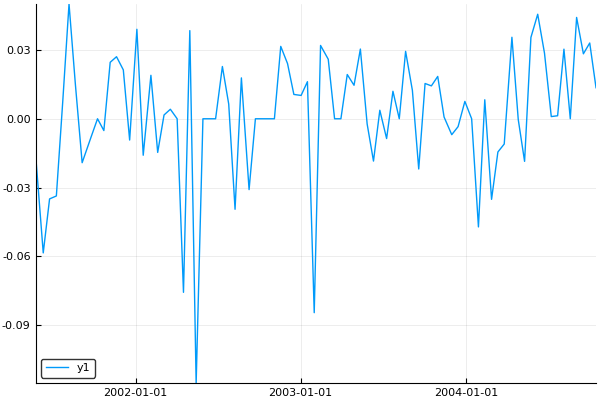

In [197]:
plot(x_list[1], res_means[1])

In [198]:
function evolve(x,y,k=1)
    nx=[1.0]
    for i=1:length(x)
        rr = last(nx)*(1+k*y[i])
        push!(nx,rr)
    end
    return (x,nx[2:end])
end

function evolve(y,k=1)
    nx=[1.0]
    for i=1:length(y)
        rr = last(nx)*(1+k*y[i])
        push!(nx,rr)
    end
    return nx
end

ppp=[]
for i=1:6
    t1 = evolve(res_means[i],1)
    thk = evolve(res_means[i],kelly(res_means[i],6)*.5)
    tk = evolve(res_means[i],kelly(res_means[i],6)*1)
    push!(ppp, hcat(t1,thk,tk))
end

In [199]:
ppp=[]
for i=1:6
    t1 = evolve(res_means[i],1)
    thk = evolve(res_means[i],kelly(res_means[i],6)*.5)
    tk = evolve(res_means[i],kelly(res_means[i],6)*1)
    push!(ppp, hcat(t1,thk,tk))
end

In [200]:
ppp[1]

87×3 Array{Float64,2}:
 1.0       1.0       1.0     
 0.984678  0.981667  0.963335
 0.927038  0.912912  0.828391
 0.894619  0.874714  0.759068
 0.864477  0.839451  0.697868
 0.870655  0.846629  0.709803
 0.914282  0.897389  0.794914
 0.928105  0.913622  0.823674
 0.910309  0.892662  0.785881
 0.90319   0.884309  0.771172
 0.90319   0.884309  0.771172
 0.898538  0.878859  0.761667
 0.920676  0.904768  0.806575
 ⋮                           
 0.894303  0.868455  0.685766
 0.926059  0.905353  0.744039
 0.9683    0.954764  0.825252
 0.996035  0.987485  0.881817
 0.996988  0.988615  0.883835
 0.998301  0.990173  0.886621
 1.02862   1.02616   0.951069
 1.02862   1.02616   0.951069
 1.07411   1.08045   1.0517  
 1.10455   1.11709   1.12303 
 1.14108   1.16129   1.2119  
 1.15639   1.17994   1.25082 

In [201]:
my_plot(dup) = plot(dup[1],dup[2])
my_plot(arr::Array) = plot(1:size(arr)[1],arr)

my_plot (generic function with 2 methods)


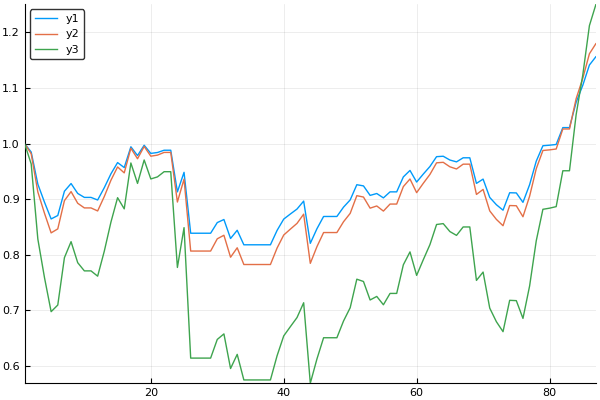

In [202]:
my_plot(ppp[1])


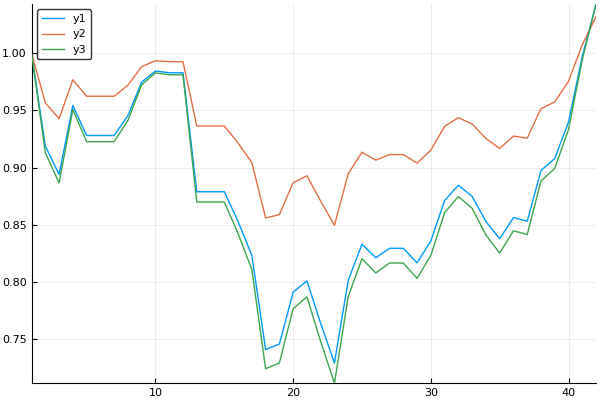

In [203]:
my_plot(ppp[2])


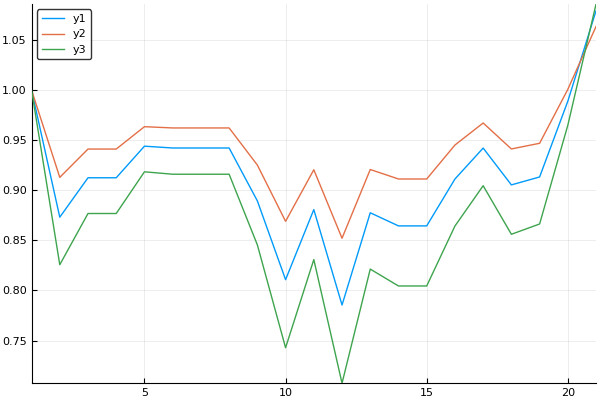

In [204]:
my_plot(ppp[3])


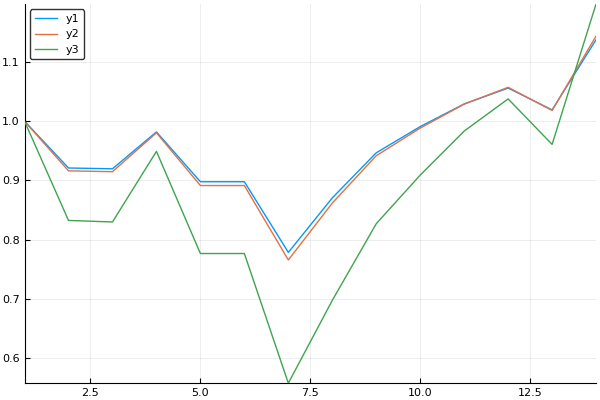

In [205]:
my_plot(ppp[4])


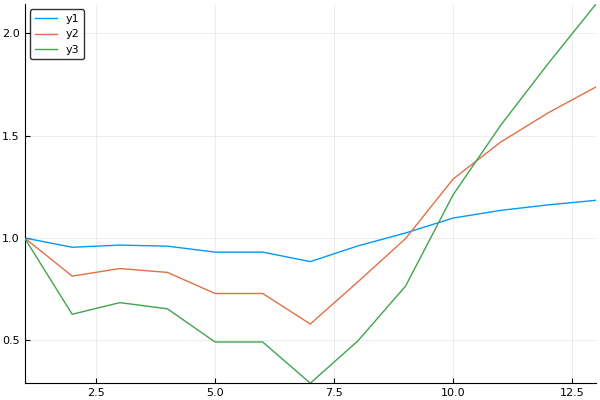

In [206]:
my_plot(ppp[5])


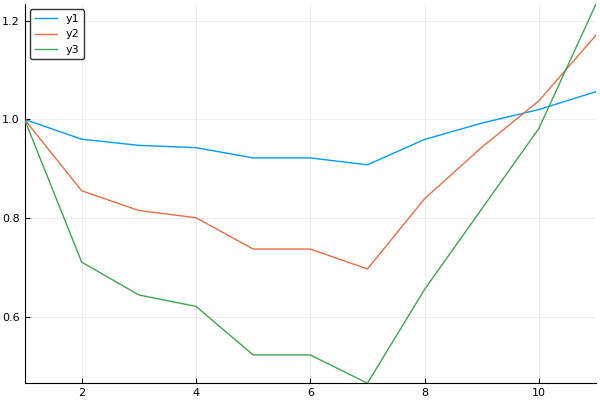

In [207]:
my_plot(ppp[6])